In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import time

In [4]:
f = lambda x: 0.5 * x + 0.2 * np.cos(3.14 * x) + 0.2 * np.sin(2 * 3.14 * x)
interval = [-2, 1]

partition = np.linspace(interval[0], interval[1], 1000)

def estimate_L(f, h, partition):
    return 2 * np.max(np.abs(f(partition[:-1]) - f(partition[1:]))/h)

h = (partition[1:] - partition[:-1])[0]

L = estimate_L(f, h, partition)

u0 = interval[0]
u1 = interval[1]
g0 = f(u0) - L * np.abs(partition - u0)
p0 = g0
g1 = f(u1) - L * np.abs(partition - u1)
p1 = np.maximum(p0, g1)

p_arr = [p1]

for iter in range(1000):
    u = partition[np.argmin(p_arr[-1])]
    g = f(u) - L * np.abs(partition - u)
    
    p = np.maximum(p_arr[-1], g)
    p_arr.append(p)

def find_global_extremum(f, interval, eps, iterations):
    st = time.time()
    partition = np.linspace(interval[0], interval[1], 1000)
    h = (partition[1:] - partition[:-1])[0]
    L = estimate_L(f, h, partition)
    
    u0 = interval[0]
    u1 = interval[1]
    g0 = f(u0) - L * np.abs(partition - u0)
    p0 = g0
    g1 = f(u1) - L * np.abs(partition - u1)
    p1 = np.maximum(p0, g1)
    
    p_arr = [p1]
    u_old = u1
    u_arr = [u_old]
    

    for iter in range(iterations):
        u = partition[np.argmin(p_arr[-1])]
        g = f(u) - L * np.abs(partition - u)
        
        p = np.maximum(p_arr[-1], g)
        p_arr.append(p)
        u_arr.append(u)
        
        if np.abs(u - u_old) < eps:
            break
        
        u_old = u
        
    et = time.time()
        
    return u, p_arr, u_arr, iter, partition, et-st

iters = 1000
epsilon = 1e-5

u, p_arr, u_arr, iter, partition, time_compl = find_global_extremum(f, interval, epsilon, iters)

In [5]:
u, iter

(-1.2552552552552552, 57)

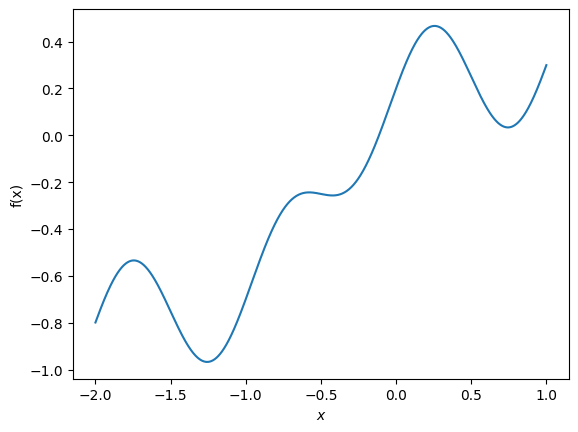

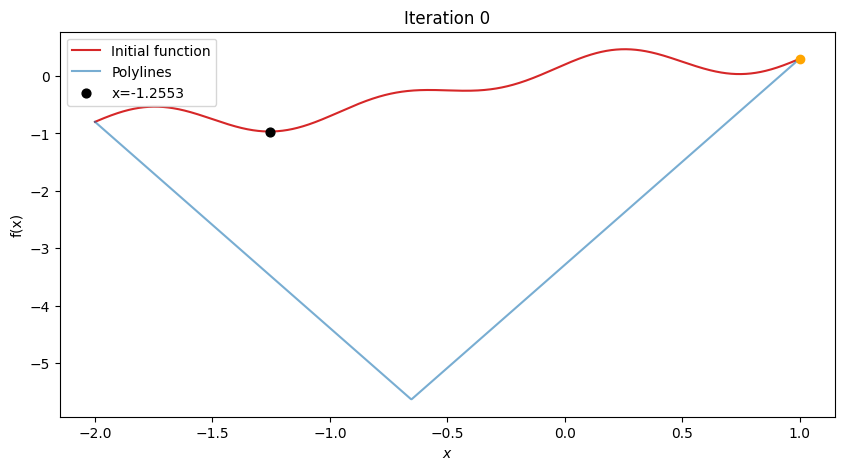

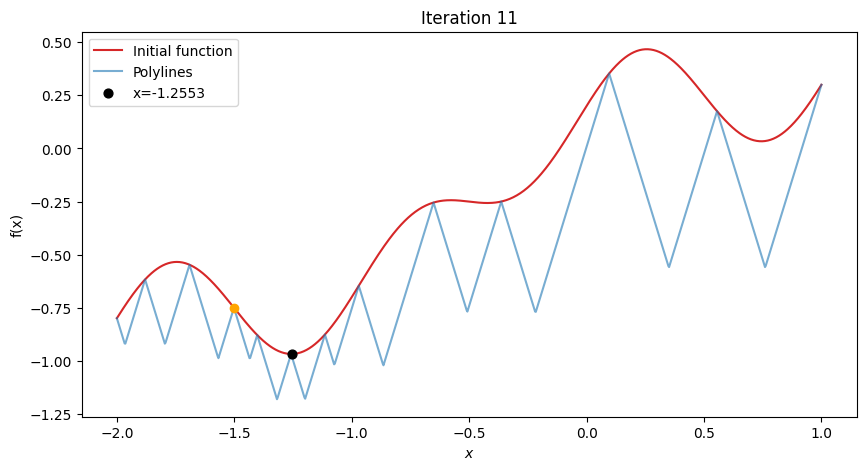

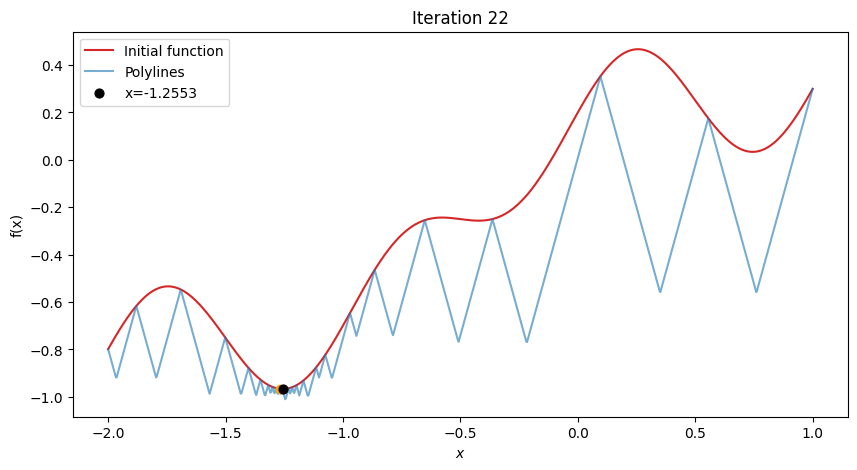

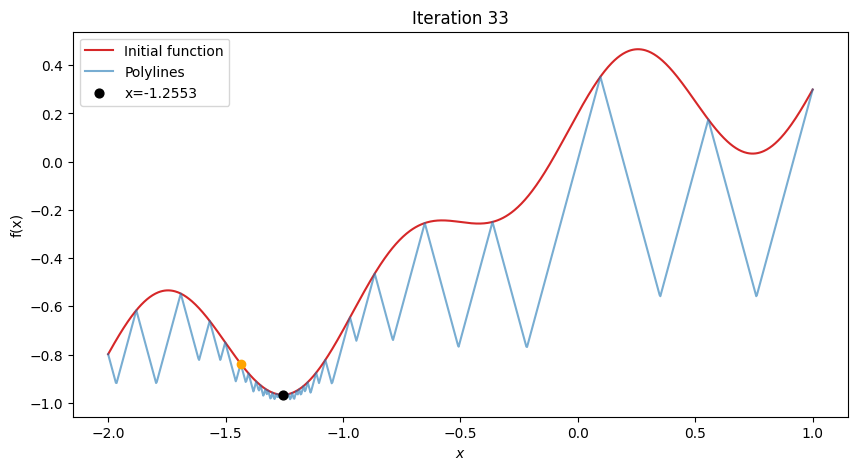

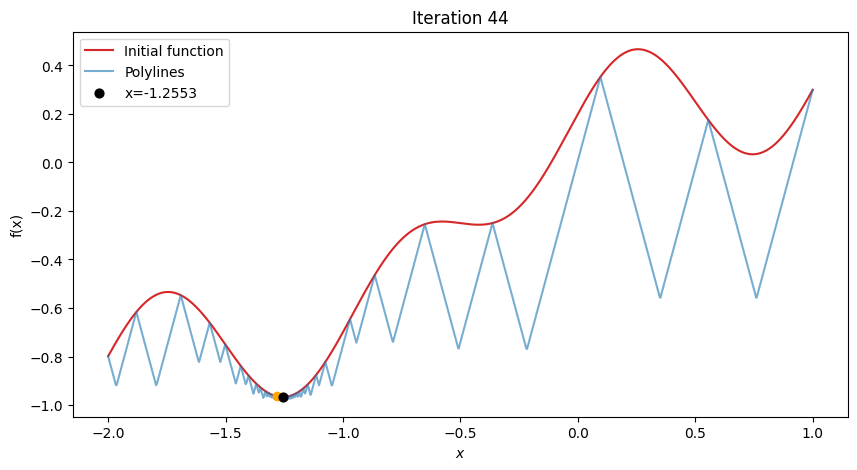

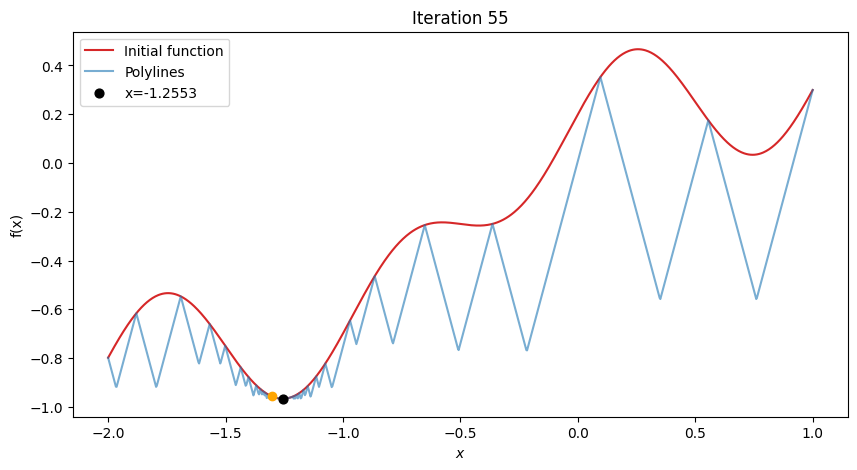

In [30]:
plt.plot(partition, f(partition))
plt.xlabel('$x$')
plt.ylabel('f(x)')

plt.show()

for i in range(0, iter, iter//5): 
    plt.subplots(figsize=(10, 5), dpi=100)

    plt.plot(partition, f(partition), color='tab:red', label='Initial function')
    plt.plot(partition, p_arr[i], color='tab:blue', label='Polylines', alpha=0.6)
    plt.scatter(u_arr[i], f(u_arr[i]), color='orange', zorder=2)
    plt.scatter(u, f(u), zorder=3, color='black', s=40, label=f'x={round(u, 4)}')

    plt.title(f'Iteration {i}')
    plt.xlabel('$x$')
    plt.ylabel('f(x)')
    plt.legend()
plt.show()

In [8]:
from scipy.optimize import minimize

st = time.time()
scipy_res = minimize(f, x0=interval[0], bounds=[(interval[0], interval[1])]).x[0]

et = time.time()

In [10]:
u, iter

(-1.2552552552552552, 57)

In [11]:
scipy_res

-2.0